<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.705671,79.103365,28.045608,52.602991,208.457634,150.964989,57.492646
1,0.0,1.0,98.777307,62.283616,87.367604,64.774875,323.203403,262.746409,60.456994
2,0.0,2.0,70.313863,42.122461,31.589873,-64.630715,89.395482,151.333068,-61.937586
3,0.0,3.0,37.762910,56.835157,28.020119,-26.648730,105.969457,126.684679,-20.715223
4,0.0,4.0,53.898337,73.218745,79.469728,63.793318,280.380129,215.886363,64.493766
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.668029,81.017222,32.391618,25.598875,223.675743,229.844824,-6.169081
119996,999.0,116.0,58.293063,79.011464,27.293654,39.527550,214.125731,205.510061,8.615670
119997,999.0,117.0,38.280351,77.252186,88.339636,6.393388,220.265562,220.926416,-0.660854
119998,999.0,118.0,42.162935,74.529725,24.622763,8.315792,159.631215,179.386417,-19.755202


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.705671,79.103365,28.045608,52.602991,208.457634,150.964989,57.492646
1,0.0,1.0,98.777307,62.283616,87.367604,64.774875,323.203403,262.746409,60.456994
2,0.0,2.0,70.313863,42.122461,31.589873,-64.630715,89.395482,151.333068,-61.937586
3,0.0,3.0,37.762910,56.835157,28.020119,-26.648730,105.969457,126.684679,-20.715223
4,0.0,4.0,53.898337,73.218745,79.469728,63.793318,280.380129,215.886363,64.493766
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.668029,81.017222,32.391618,25.598875,223.675743,229.844824,-6.169081
119996,999.0,116.0,58.293063,79.011464,27.293654,39.527550,214.125731,205.510061,8.615670
119997,999.0,117.0,38.280351,77.252186,88.339636,6.393388,220.265562,220.926416,-0.660854
119998,999.0,118.0,42.162935,74.529725,24.622763,8.315792,159.631215,179.386417,-19.755202


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    38.705671  79.103365  28.045608  ...  208.457634  150.964989  57.492646
      1.0    98.777307  62.283616  87.367604  ...  323.203403  262.746409  60.456994
      2.0    70.313863  42.122461  31.589873  ...   89.395482  151.333068 -61.937586
      3.0    37.762910  56.835157  28.020119  ...  105.969457  126.684679 -20.715223
      4.0    53.898337  73.218745  79.469728  ...  280.380129  215.886363  64.493766
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  74.668029  81.017222  32.391618  ...  223.675743  229.844824  -6.169081
      116.0  58.293063  79.011464  27.293654  ...  214.125731  205.510061   8.615670
      117.0  38.280351  77.252186  88.339636  ...  220.265562  220.926416  -0.660854
      118.0  42.162935  74.529725  24.622763  ...  159.631215  179.386417 -19.755202
      119.0  22.922278  41.636598  99.728394  ...  222.869127  158.970561  63.898566

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    38.705671  79.103365  28.045608  ...  208.457634  150.964989  57.492646
      1.0    98.777307  62.283616  87.367604  ...  323.203403  262.746409  60.456994
      2.0    70.313863  42.122461  31.589873  ...   89.395482  151.333068 -61.937586
      3.0    37.762910  56.835157  28.020119  ...  105.969457  126.684679 -20.715223
      4.0    53.898337  73.218745  79.469728  ...  280.380129  215.886363  64.493766
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  74.668029  81.017222  32.391618  ...  223.675743  229.844824  -6.169081
      116.0  58.293063  79.011464  27.293654  ...  214.125731  205.510061   8.615670
      117.0  38.280351  77.252186  88.339636  ...  220.265562  220.926416  -0.660854
      118.0  42.162935  74.529725  24.622763  ...  159.631215  179.386417 -19.755202
      119.0  22.922278  41.636598  99.728394  ...  222.869127  158.970561  63.898566

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.705671,79.103365,28.045608,52.602991,208.457634,150.964989,57.492646
1,0.0,1.0,98.777307,62.283616,87.367604,64.774875,323.203403,262.746409,60.456994
2,0.0,2.0,70.313863,42.122461,31.589873,-64.630715,89.395482,151.333068,-61.937586
3,0.0,3.0,37.762910,56.835157,28.020119,-26.648730,105.969457,126.684679,-20.715223
4,0.0,4.0,53.898337,73.218745,79.469728,63.793318,280.380129,215.886363,64.493766
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.668029,81.017222,32.391618,25.598875,223.675743,229.844824,-6.169081
119996,999.0,116.0,58.293063,79.011464,27.293654,39.527550,214.125731,205.510061,8.615670
119997,999.0,117.0,38.280351,77.252186,88.339636,6.393388,220.265562,220.926416,-0.660854
119998,999.0,118.0,42.162935,74.529725,24.622763,8.315792,159.631215,179.386417,-19.755202


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    38.705671  79.103365  28.045608  ...  208.457634  150.964989  57.492646
      1.0    98.777307  62.283616  87.367604  ...  323.203403  262.746409  60.456994
      2.0    70.313863  42.122461  31.589873  ...   89.395482  151.333068 -61.937586
      3.0    37.762910  56.835157  28.020119  ...  105.969457  126.684679 -20.715223
      4.0    53.898337  73.218745  79.469728  ...  280.380129  215.886363  64.493766
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  74.668029  81.017222  32.391618  ...  223.675743  229.844824  -6.169081
      116.0  58.293063  79.011464  27.293654  ...  214.125731  205.510061   8.615670
      117.0  38.280351  77.252186  88.339636  ...  220.265562  220.926416  -0.660854
      118.0  42.162935  74.529725  24.622763  ...  159.631215  179.386417 -19.755202
      119.0  22.922278  41.636598  99.728394  ...  222.869127  158.970561  63.898566

[120000 rows x 7 columns]

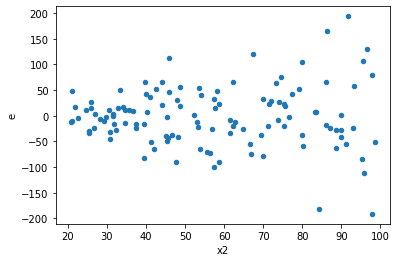

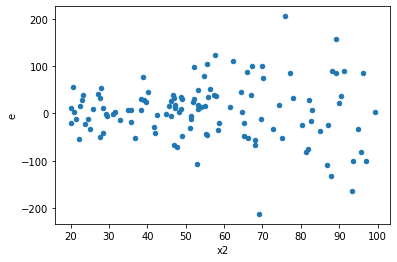

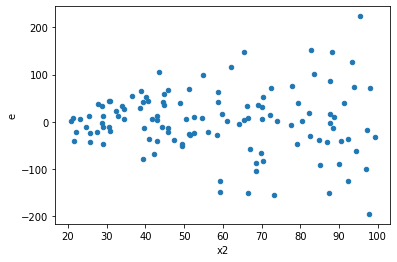

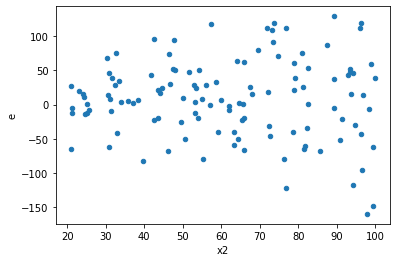

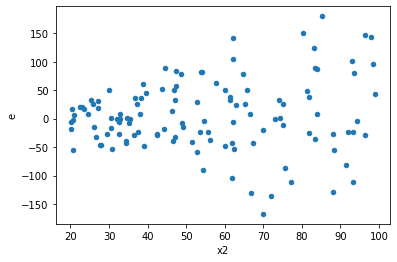

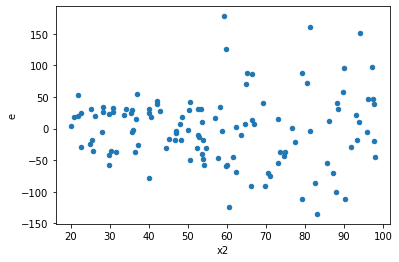

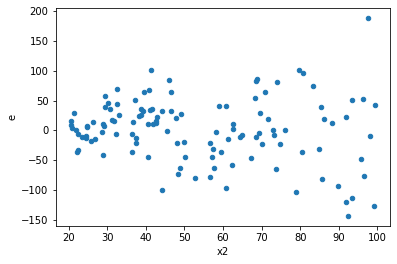

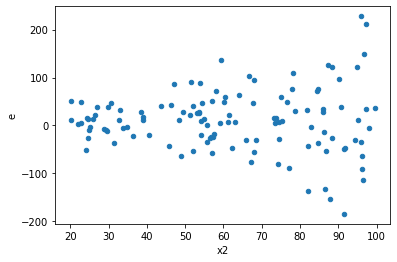

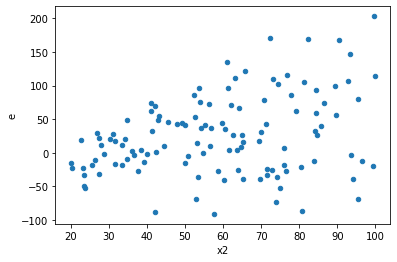

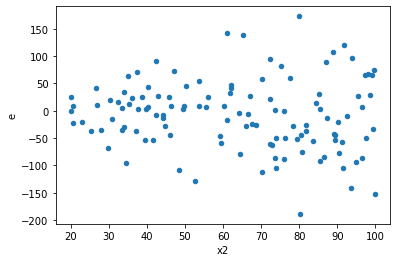

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,64139.510099055056,271295.7668465385,1425.322446645668,6028.794818811967,4.229776099436335,3.7589598196330343e-06,0.9999981205200902,1.8794799098165171e-06,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,48408.06677749878,303384.36722028186,1075.7348172777506,6741.8748271173745,6.267227497738086,8.38811153869301e-09,0.9999999958059442,4.194055769346505e-09,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,61363.397938994334,318915.04270733136,1363.6310653109852,7087.000949051808,5.197154222528342,1.7149975883867796e-07,0.9999999142501206,8.574987941933898e-08,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,69542.07120558439,235670.01649470872,1545.3793601240975,5237.1114776601935,3.3888840583710405,7.655927175242994e-05,0.9999617203641238,3.827963587621497e-05,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,47089.98000711244,329065.7869091648,1046.4440001580542,7312.5730424258845,6.9880213765107335,1.3356529215968749e-09,0.9999999993321735,6.678264607984374e-10,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,42015.51212119484,201748.96836548363,933.6780471376632,4483.310408121858,4.801773397014261,5.789019441593268e-07,0.9999997105490279,2.894509720796634e-07,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,40047.88168373706,220387.63802217998,889.9529263052681,4897.503067159555,5.5031035040157095,6.959732301581312e-08,0.9999999652013385,3.479866150790656e-08,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,53466.69178048903,340019.2750720827,1188.1487062330896,7555.9838904907265,6.359459763623564,6.57717502683397e-09,0.9999999967114125,3.288587513416985e-09,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,54679.72866057389,205788.96846603736,1215.1050813460865,4573.088188134164,3.7635330954818516,1.9193487045932045e-05,0.999990403256477,9.596743522966023e-06,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,64139.510099055056,271295.7668465385,1425.322446645668,6028.794818811967,4.229776099436335,3.7589598196330343e-06,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,48408.06677749878,303384.36722028186,1075.7348172777506,6741.8748271173745,6.267227497738086,8.38811153869301e-09,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,61363.397938994334,318915.04270733136,1363.6310653109852,7087.000949051808,5.197154222528342,1.7149975883867796e-07,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,69542.07120558439,235670.01649470872,1545.3793601240975,5237.1114776601935,3.3888840583710405,7.655927175242994e-05,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,47089.98000711244,329065.7869091648,1046.4440001580542,7312.5730424258845,6.9880213765107335,1.3356529215968749e-09,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,42015.51212119484,201748.96836548363,933.6780471376632,4483.310408121858,4.801773397014261,5.789019441593268e-07,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,40047.88168373706,220387.63802217998,889.9529263052681,4897.503067159555,5.5031035040157095,6.959732301581312e-08,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,53466.69178048903,340019.2750720827,1188.1487062330896,7555.9838904907265,6.359459763623564,6.57717502683397e-09,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,54679.72866057389,205788.96846603736,1215.1050813460865,4573.088188134164,3.7635330954818516,1.9193487045932045e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    993
Reject001=1 : Homoscedasticity        7
Name: Result_test, dtype: int64